# Projeto 1- Relatório de fechamento de mercado por e-mail.

Deasafio:

*Redigir um email que chegue todos os dias na caixa de entrada do usuário com informações de fechamento de mercado.

In [3]:
!pip install yfinance==0.1.74


In [5]:
!pip install pandas 

In [6]:
!pip install mplcyberpunk

# Importando os módulos necessários

In [9]:
!pip install python-dotenv

In [11]:
import pandas as pd
import datetime
import yfinance as yf


In [13]:
from matplotlib import pyplot as plt
import mplcyberpunk
import smtplib


In [16]:
from email.message import EmailMessage

# Pegar dados no Yahoo Finance

In [21]:
#Esolher dados no site do yahoo finance

ativos = ['^BVSP','BRL=X']

#Definir data

hoje = datetime.datetime.now()
um_ano_atras = hoje - datetime.timedelta(days = 365)

dados_mercado = yf.download(ativos, um_ano_atras,hoje)


display(dados_mercado)

[*********************100%***********************]  2 of 2 completed


Adj Close             Close                High            \
               BRL=X     ^BVSP   BRL=X     ^BVSP     BRL=X     ^BVSP   
Date                                                                   
2022-04-05    4.5938  118885.0  4.5938  118885.0  4.669100  121628.0   
2022-04-06    4.6507  118228.0  4.6507  118228.0  4.712600  118885.0   
2022-04-07    4.7152  118862.0  4.7152  118862.0  4.769900  119247.0   
2022-04-08    4.7521  118322.0  4.7521  118322.0  4.791300  118868.0   
2022-04-11    4.6981  116953.0  4.6981  116953.0  4.732600  118320.0   
...              ...       ...     ...       ...       ...       ...   
2023-03-30    5.1342  103713.0  5.1342  103713.0  5.155928  104085.0   
2023-03-31    5.0927  101882.0  5.0927  101882.0  5.103300  104041.0   
2023-04-03    5.0623  101506.0  5.0623  101506.0  5.075500  101916.0   
2023-04-04    5.0631  101869.0  5.0631  101869.0  5.097600  103056.0   
2023-04-05    5.0823       NaN  5.0823       NaN  5.086400       NaN   

                 Low              Open           Volume              
               BRL=X     ^BVSP   BRL=X     ^BVSP  BRL=X       ^BVSP  
Date                                                                 
2022-04-05  4.575500  118794.0  4.5938  121279.0      0  11788300.0  
2022-04-06  4.647900  116791.0  4.6507  118885.0      0  13410800.0  
2022-04-07  4.690400  117509.0  4.7152  118226.0      0  11520100.0  
2022-04-08  4.707518  117487.0  4.7521  118861.0      0  11225800.0  
2022-04-11  4.684016  116953.0  4.6980  118320.0      0   9558400.0  
...              ...       ...     ...       ...    ...         ...  
2023-03-30  5.077300  101796.0  5.1342  101796.0      0  14901600.0  
2023-03-31  5.055200  101476.0  5.0927  103714.0      0  15111200.0  
2023-04-03  5.036216  100651.0  5.0623  101883.0      0  12794800.0  
2023-04-04  5.048277  101505.0  5.0631  101505.0      0  11695800.0  
2023-04-05  5.073100       NaN  5.0864       NaN      0         NaN  

[262 rows x 12 columns]

# Manipulação de Dados - Seleção e Exclusão de dados


In [28]:
#Criando uma tabela diária

dados_fechamento = dados_mercado['Adj Close']

#mudar nome da coluna
dados_fechamento.columns = ['Dolar','Ibovespa']

#remover N/A
dados_fehamento = dados_fechamento.dropna()

dados_fechamento

,Dolar,Ibovespa
Date,,
2022-04-05,4.5938,118885.0
2022-04-06,4.6507,118228.0
2022-04-07,4.7152,118862.0
2022-04-08,4.7521,118322.0
2022-04-11,4.6981,116953.0
...,...,...
2023-03-30,5.1342,103713.0
2023-03-31,5.0927,101882.0
2023-04-03,5.0623,101506.0


# Manipulando os dados - Criando tabelas com outros timeframes

In [31]:
# Criando uma tabela mensal

dados_fechamento_mensal = dados_fechamento.resample('M').last()
dados_fechamento_mensal

,Dolar,Ibovespa
Date,,
2022-04-30,4.9378,107876.0
2022-05-31,4.7524,111351.0
2022-06-30,5.1809,98542.0
2022-07-31,5.1827,103165.0
2022-08-31,5.1219,109523.0
2022-09-30,5.3962,110037.0
2022-10-31,5.2885,116037.0
2022-11-30,5.2682,112486.0
2022-12-31,5.2846,110031.0


In [30]:
# Criando uma tabela anual

dados_fechamento_anual = dados_fechamento.resample('Y').last()
dados_fechamento_anual

,Dolar,Ibovespa
Date,,
2022-12-31,5.2846,110031.0
2023-12-31,5.0823,101869.0


# Calcular fechamento do dia, retorno no ano e retorno no mês dos ativos

In [34]:
#Calculando os retornos 

retorno_no_ano = dados_fechamento_anual.pct_change().dropna()
retorno_no_mes = dados_fechamento_mensal.pct_change().dropna()
retorno_no_dia = dados_fechamento.pct_change().dropna()

retorno_no_dia

,Dolar,Ibovespa
Date,,
2022-04-06,0.012386,-0.005526
2022-04-07,0.013869,0.005363
2022-04-08,0.007826,-0.004543
2022-04-11,-0.011363,-0.011570
2022-04-12,-0.000958,-0.006892
...,...,...
2023-03-30,-0.005848,0.018862
2023-03-31,-0.008083,-0.017654
2023-04-03,-0.005969,-0.003691


# Localizar o fechamento do dia anterior, retorno no mês e retorno no ano

- loc -> referenciar elementors a partir do nome
- iloc -> selecionar elementos como uma matriz

In [51]:
retorno_dia_dolar = retorno_no_dia.iloc[-1,0]
retorno_dia_ibovespa = retorno_no_dia.iloc[-1,1]

retorno_mes_dolar = retorno_no_mes.iloc[-1,0]
retorno_mes_ibovespa = retorno_no_mes.iloc[-1,1]

retorno_ano_dolar = retorno_no_ano.iloc[-1,0]
retorno_ano_ibovespa = retorno_no_ano.iloc[-1,1]

retorno_ano_dolar

-0.038280967956191514

In [53]:
#Deixando os dados mais limpos

retorno_dia_dolar = round(retorno_dia_dolar * 100,2)
retorno_dia_ibovespa = round(retorno_dia_ibovespa * 100,2)

retorno_mes_dolar = round(retorno_mes_dolar * 100,2)
retorno_mes_ibovespa = round(retorno_mes_ibovespa * 100,2)

retorno_ano_dolar = round(retorno_ano_dolar * 100,2)
retorno_ano_ibovespa = round(retorno_ano_ibovespa * 100,2)


In [54]:
retorno_dia_dolar

0.38

# Fazer os gráficos da performance do último dos ativos

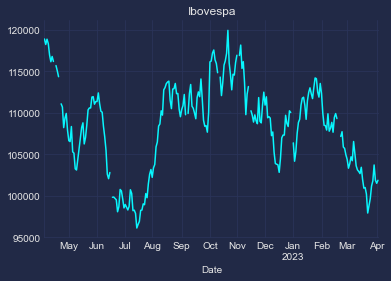

In [56]:
#Criando grárico da Ibovespa

plt.style.use('cyberpunk')
dados_fechamento.plot(y='Ibovespa', use_index=True, legend= False)
plt.title('Ibovespa')

plt.savefig('Ibovespa.png', dpi = 300)
plt.show()

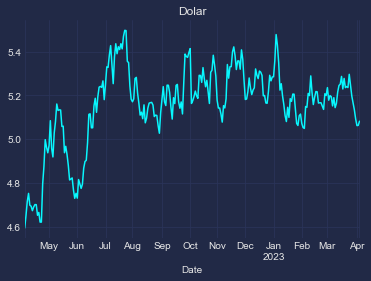

In [57]:
#Criando grárico da Ibovespa

plt.style.use('cyberpunk')
dados_fechamento.plot(y='Dolar', use_index=True, legend= False)
plt.title('Dolar')

plt.savefig('Dolar.png', dpi = 300)
plt.show()

# Enviar e-mail

In [58]:
import os
from dotenv import load_dotenv

In [59]:
load_dotenv()

True

In [77]:
senha = os.environ.get('senha')
email='liliancepillo@gmail.com'


In [91]:
msg = EmailMessage()
msg['Subject'] = 'Enviando e-mail com o Python'
msg['From'] = 'liliancepillo@gmail.com'
msg['To'] = 'liliancepillo@gmail.com'

msg.set_content(f'''Prezado diretor, segue o relatório diário:

Bolsa:

No ano o Ibovespa está tendo uma rentabilidade de {retorno_ano_ibovespa}%, enquanto no mês a rentabilidade é de {retorno_mes_ibovespa}%.

No último dia útil, o fechamento do Ibovespa foi de {retorno_dia_ibovespa}%.
                

Dolar:
                
No ano o Dólar está tendo uma rentabilidade de {retorno_ano_dolar}%, enquanto no mês a rentabilidade é de {retorno_mes_dolar}%.
                
No último dia útil, o fechamento do Dólar foi de {retorno_dia_dolar}%.
                

Melhores Cumprimentos,
                

A melhor Cientista de Dados do Mundo,
                

               
''')

In [92]:
with open('Dolar.png', 'rb') as content_file:
          content = content_file.read()
          msg.add_attachment(content, maintype ='application', subtype='png', filename ='Dolar.png')
            
with open('Ibovespa.png', 'rb') as content_file:
          content = content_file.read()
          msg.add_attachment(content, maintype ='application', subtype='png', filename ='Ibovespa.png')

In [93]:
with smtplib.SMTP_SSL('smtp.gmail.com',465) as smtp:
    
    smtp.login(email,senha)
    smtp.send_message(msg)